# Import Libraries and Setup

In [12]:
# manipulate data
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# library to access google trends
from pytrends.request import TrendReq

# custom functions
import get_daily_data as g

# define request item to "query" google trends "API"
pytrend = TrendReq()

# make pandas types compatibile with matplotlib
pd.plotting.register_matplotlib_converters()

# change pandas plotting backend
pd.options.plotting.backend = "plotly"

# create a dictionary to unpack to update plotly plots settings
# why can't it be as easy as with ggplot...
plotly_dict = dict(
    font_family="Yanone Kaffeesatz",
    template="none",
    title={
        "x": 0.05,
        "xanchor": "left"
    }
)

sns.set_style(style="darkgrid", rc={"axes.facecolor":"0.9","grid.color":"0.8"})
sns.set_palette(palette="deep")
%matplotlib inline

plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.dpi"] = 100

# An Example Request

Let's try with an example request:

In [19]:
pytrend.build_payload(kw_list=["Mario Draghi"])
pytrend.interest_over_time()

,Mario Draghi,isPartial
date,,
2016-08-21,0,False
2016-08-28,0,False
2016-09-04,1,False
2016-09-11,0,False
2016-09-18,0,False
...,...,...
2021-07-11,2,False
2021-07-18,2,False
2021-07-25,2,False


# First Attempt

## Get the data

In [14]:
overlap_30 = g.get_daily_trend(
    pytrend,
    keyword="Mario Draghi",
    start="2012-01-01",
    end="2021-05-31",
    overlap=30
)

overlap_100 = g.get_daily_trend(
    pytrend,
    keyword="Mario Draghi",
    start="2012-01-01",
    end="2021-05-31",
    overlap=100
)

## Save the data

In [ ]:
overlap_30.to_csv("./data/overlap_30.csv")
overlap_100.to_csv("./data/overlap_100.csv")

# Plotting

In [15]:
overlap_30.plot(y = "Mario Draghi", kind="line").update_layout(**plotly_dict)

In [17]:
overlap_100.plot(y = "Mario Draghi", kind="line").update_layout(**plotly_dict)

Text(0.5, 0.98, 'Mario Draghi Google Trends Results, 30 and 100 Days Overlap')

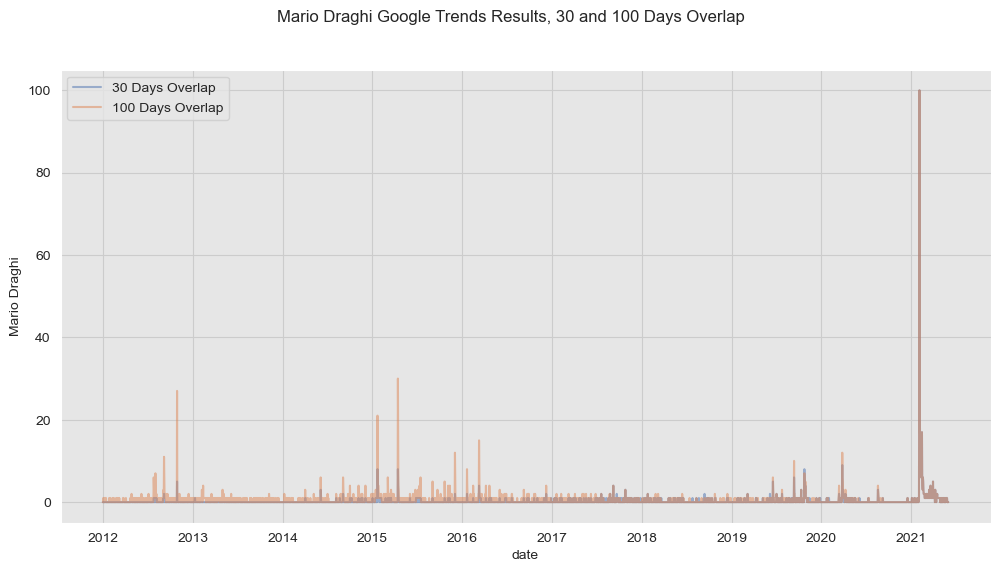

In [18]:
fig, ax = plt.subplots()

sns.lineplot(
    x = overlap_30.index,
    y = "Mario Draghi",
    label = "30 Days Overlap",
    data = overlap_30,
    alpha = 0.5,
    ax = ax
)

sns.lineplot(
    x = overlap_100.index,
    y = "Mario Draghi",
    label = "100 Days Overlap",
    data = overlap_100,
    alpha = 0.5,
    ax = ax
)

plt.suptitle("Mario Draghi Google Trends Results, 30 and 100 Days Overlap")